In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [4]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP + 'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'

In [5]:
toxval = pd.read_csv(raw_dir+'toxval95_all.csv', index_col = [0])

/tmp/ipykernel_4179029/845230242.py:1: DtypeWarning: Columns (33,39) have mixed types. Specify dtype option on import or set low_memory=False.
  toxval = pd.read_csv(raw_dir+'toxval95_all.csv', index_col = [0])


In [6]:
toxval.head()

,dtxsid,source,subsource,qc_status,human_eco,toxval_type,toxval_subtype,toxval_type_supercategory,toxval_numeric_qualifier,toxval_numeric,...,author,journal,volume,ref_year,issue,url,study_group,source_hash,cleaned_casrn,cleaned_name
0,DTXSID3059921,PFAS 150 SEM v2,-,pass,human health,NOAEL,System-level NOAEL,Point of Departure,=,1.0,...,-,-,-,-,-,-,PFAS 150 SEM v2_dup_37:F:P0-,0751357390578e7bfbe70636a7815234,376-06-7,Perfluorotetradecanoic acid
1,DTXSID3059921,PFAS 150 SEM v2,-,pass,human health,NOAEL,System-level NOAEL,Point of Departure,=,1.0,...,-,-,-,-,-,-,PFAS 150 SEM v2_dup_37:F:P0-,0751357390578e7bfbe70636a7815234,376-06-7,Perfluorotetradecanoic acid
2,DTXSID3059921,PFAS 150 SEM v2,-,pass,human health,NOAEL,System-level NOAEL,Point of Departure,=,1.0,...,-,-,-,-,-,-,PFAS 150 SEM v2_dup_37:F:P0-,0751357390578e7bfbe70636a7815234,376-06-7,Perfluorotetradecanoic acid
3,DTXSID3059921,PFAS 150 SEM v2,-,pass,human health,NOAEL,System-level NOAEL,Point of Departure,=,1.0,...,-,-,-,-,-,-,PFAS 150 SEM v2_dup_37:F:P0-,0751357390578e7bfbe70636a7815234,376-06-7,Perfluorotetradecanoic acid
4,DTXSID3059921,PFAS 150 SEM v2,-,pass,human health,NOAEL,System-level NOAEL,Point of Departure,=,1.0,...,-,-,-,-,-,-,PFAS 150 SEM v2_dup_37:F:P0-,0751357390578e7bfbe70636a7815234,376-06-7,Perfluorotetradecanoic acid


In [7]:
mask = (toxval['exposure_route'] == 'oral') & (toxval['qc_status'] == 'pass') & (toxval['toxval_type_supercategory'] =='Point of Departure') & \
(toxval['toxval_type'].isin(['NOAEL', 'NOEL', 'LEL', 'LOAEL', 'LOEL','HNEL', 'NEL',  'NOAEC', 'LOAEC'])) & \
(toxval['species_id'].isin([4491,4500,4501,4510,4511,4516,4520,4901,4913,4928,4988,5557,7630,7632,11193,17317,19568,20657,21216,22808])) &\
toxval['study_type'].isin(['chronic', 'subchronic', 'reproduction developmental', 'developmental', 'short-term', 'reproduction', '28-day']) 



In [8]:
toxval1 = toxval[mask]

In [9]:
toxval1['study_type'].unique()

array(['reproduction developmental', 'subchronic', 'reproduction',
       'short-term', 'chronic', '28-day', 'developmental'], dtype=object)

In [10]:
toxval1.shape

(94593, 45)

In [11]:
mask1 = ~((toxval1['study_type'] == 'short-term') & (toxval1['study_duration_value'] <14)) 

In [12]:
toxval1 = toxval1[mask1]

In [13]:
mask2 = (toxval1['toxval_units'].isin(['mg/kg', 'mg/kg-day']))

In [14]:
toxval1 = toxval1[mask2]

In [15]:
toxval1['toxval_units'].value_counts()

mg/kg-day    84983
mg/kg          313
Name: toxval_units, dtype: int64

In [16]:
species_dict = {22808: [4491, 7632], 4510: [4511,4516,5557,17317,20657], 4913:[4901,4520,4500,4501,19568], 7630: 4928, 21216:11193}

In [17]:
species_dict1 =  {value: key for key, values in species_dict.items() for value in (values if isinstance(values, list) else [values])}

In [18]:
toxval1['species_id_rev'] = toxval1['species_id'].replace(species_dict1)

In [19]:
 toxval1['species_id_rev'].unique()

array([ 4510,  4913, 22808,  7630, 21216,  4988])

In [20]:
species_name = {4510: 'rat', 4913: 'mouse', 4988: 'guinea_pig', 7630: 'dog', 21216: 'hamster', 22808: 'rabbit'}

In [21]:
toxval1['common_species'] =toxval1['species_id_rev'].replace(species_name)

In [22]:
toxval1['common_species'].unique()

array(['rat', 'mouse', 'rabbit', 'dog', 'hamster', 'guinea_pig'],
      dtype=object)

In [23]:
toxval1.columns

Index(['dtxsid', 'source', 'subsource', 'qc_status', 'human_eco',
       'toxval_type', 'toxval_subtype', 'toxval_type_supercategory',
       'toxval_numeric_qualifier', 'toxval_numeric', 'toxval_units', 'mw',
       'toxval_numeric_original', 'toxval_units_original',
       'risk_assessment_class', 'study_type', 'study_type_original',
       'study_duration_value', 'study_duration_units', 'study_duration_class',
       'species_id', 'common_name', 'latin_name', 'ecotox_group', 'strain',
       'strain_group', 'sex', 'generation', 'exposure_route',
       'exposure_method', 'critical_effect', 'critical_effect_original',
       'year', 'long_ref', 'title', 'author', 'journal', 'volume', 'ref_year',
       'issue', 'url', 'study_group', 'source_hash', 'cleaned_casrn',
       'cleaned_name', 'species_id_rev', 'common_species'],
      dtype='object')

<Axes: >

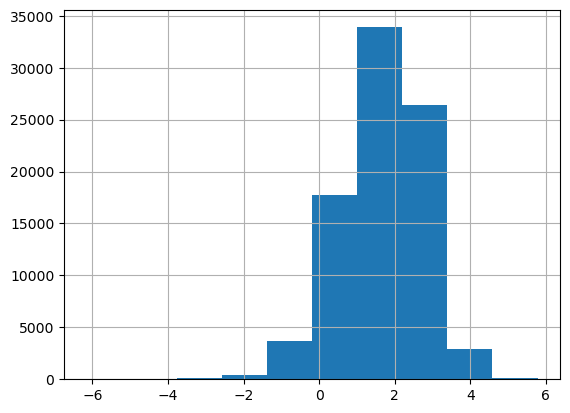

In [24]:
np.log10(toxval1.toxval_numeric).hist()

In [25]:
toxval2 = toxval1[['dtxsid', 'cleaned_casrn',
       'cleaned_name','toxval_type', 'toxval_subtype', 'toxval_type_supercategory', 'risk_assessment_class', 
       'toxval_numeric_qualifier', 'toxval_numeric', 'toxval_units', 'mw', 'study_type','study_duration_value', 'study_duration_units', 'study_duration_class',
       'common_species','exposure_route',
       'exposure_method', 'critical_effect', ]]

In [26]:
body_weights = {'rat': 0.25, 'mouse':0.025, 'human' : 70, 'dog': 12, 'guinea_pig': 0.4, 'hamster':0.08, 'rabbit': 1.8, 'monkey' :3, 'ferret': 0.3, 'mini pig': 40}

In [27]:
toxval2['common_species'].value_counts()

rat           58103
mouse         12717
dog            8557
rabbit         5502
hamster         325
guinea_pig       92
Name: common_species, dtype: int64

In [28]:
toxval2['toxval_type'].unique()

array(['NOAEL', 'LOAEL', 'LEL', 'NEL', 'NOEL', 'LOEL', 'NOAEC', 'LOAEC',
       'HNEL'], dtype=object)

In [29]:
effects = {k:list(set(v['critical_effect'].values)) for k,v in toxval2.groupby('study_type')}

In [30]:
effects.keys()

dict_keys(['28-day', 'chronic', 'developmental', 'reproduction', 'reproduction developmental', 'short-term', 'subchronic'])

In [31]:
toxval2.head()

,dtxsid,cleaned_casrn,cleaned_name,toxval_type,toxval_subtype,toxval_type_supercategory,risk_assessment_class,toxval_numeric_qualifier,toxval_numeric,toxval_units,mw,study_type,study_duration_value,study_duration_units,study_duration_class,common_species,exposure_route,exposure_method,critical_effect
0,DTXSID3059921,376-06-7,Perfluorotetradecanoic acid,NOAEL,System-level NOAEL,Point of Departure,reproduction,=,1.0,mg/kg-day,714.117,reproduction developmental,1.0,generations,reproduction,rat,oral,gavage,Endocrine:Adrenal:Adrenal Gland Histopathology...
1,DTXSID3059921,376-06-7,Perfluorotetradecanoic acid,NOAEL,System-level NOAEL,Point of Departure,reproduction,=,1.0,mg/kg-day,714.117,reproduction developmental,1.0,generations,reproduction,rat,oral,gavage,Endocrine:Adrenal:Adrenal Gland Histopathology...
2,DTXSID3059921,376-06-7,Perfluorotetradecanoic acid,NOAEL,System-level NOAEL,Point of Departure,reproduction,=,1.0,mg/kg-day,714.117,reproduction developmental,1.0,generations,reproduction,rat,oral,gavage,Endocrine:Adrenal:Adrenal Gland Histopathology...
3,DTXSID3059921,376-06-7,Perfluorotetradecanoic acid,NOAEL,System-level NOAEL,Point of Departure,reproduction,=,1.0,mg/kg-day,714.117,reproduction developmental,1.0,generations,reproduction,rat,oral,gavage,Endocrine:Adrenal:Adrenal Gland Histopathology...
4,DTXSID3059921,376-06-7,Perfluorotetradecanoic acid,NOAEL,System-level NOAEL,Point of Departure,reproduction,=,1.0,mg/kg-day,714.117,reproduction developmental,1.0,generations,reproduction,rat,oral,gavage,Endocrine:Adrenal:Adrenal Gland Histopathology...


In [32]:
toxval2['study_type'].unique()

array(['reproduction developmental', 'subchronic', 'reproduction',
       'short-term', 'chronic', '28-day', 'developmental'], dtype=object)

In [33]:
study_type = {'reproduction developmental' : 'repro/dev' , 'subchronic' :'subchronic' , 'reproduction':'repro/dev',
       'short-term':'subacute', 'chronic':'chronic', '28-day':'subacute', 'developmental':'repro/dev'}

In [34]:
toxval2['study_type_revised'] = toxval2['study_type'].replace(study_type)

/tmp/ipykernel_4179029/2511312201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toxval2['study_type_revised'] = toxval2['study_type'].replace(study_type)


In [35]:
def conversion_factor(species, human=70):
    '''
    Input from several species including rat, mouse, human and effect level determined from that species
    '''
    body_weights = {'rat': 0.25, 'mouse':0.025, 'human' : 70, 'dog': 12, 'guinea pig': 0.4, 'hamster':0.08, 'rabbit': 1.8, 'monkey' :3, 'ferret': 0.3, 'mini pig': 40}
    sbw = body_weights[species] 
    human = 70
    CF = (human**0.25)/(sbw**0.25)
    
    return CF

In [36]:
conversion_factor(species = 'rat')

4.090623489235047

In [24]:
conceptual_model2 = {'quantal-deterministic': ['neurobehaviour', 'multiple',
                                     'none',
                                     'other'], 'quantal-stochastic': ['development','reproduction' ,'multiple',
                                     'none',
                                     'other']}




In [25]:
reversed_model2 = {value: key for key, values in conceptual_model2.items() for value in (values if isinstance(values, list) else [values])}

In [28]:
reversed_model1 =  {value: key for key, values in conceptual_model1.items() for value in (values if isinstance(values, list) else [values])}

In [27]:
conceptual_model1 = {'continuous' : ['body weight','clinical chemistry', 'enzyme activity', 'food and/or water consumption', 'hematology',
'neurotransmitter',
'organ weight',
'urinalysis',
 'multiple'  ,
    'none',
 'other',
'neurobehaviour',
'development',
'reproduction'],
 'quantal-deterministic': [ 'non-neoplastic histopathology','clinical signs',
'gross pathology', ],
  'quantal-stochastic':    
'mortality/survival'}


In [37]:
class BMDExtrapolator:
    def __init__(self, toxicity_dose=10, pod_type = 'NOAEL', cm='cm1', duration='chronic', species='rat'):
        self.cm = cm
        self.toxicity_dose = toxicity_dose
        self.duration = duration
        self.species = species
        self.pod_type = pod_type

    def extrapolate_BMD(self):
        f1 = self.get_f1(self.duration)
        f2 = self.get_f2(self.pod_type)
        f3 = self.get_f3(self.species)
        f4 = self.get_f4(self.cm, self.duration)
        BMD = self.toxicity_dose / (f1 * f2 * f3 * f4)
        return BMD

    def get_f1(self, duration):
        if duration == 'chronic':
            return 1
        elif duration == 'subchronic':
            return 2
        elif duration == 'subacute':
            return 5
        elif duration == 'repro/dev':
            return 1
        else:
            raise ValueError("Invalid duration provided.")

    def get_f2(self, pod_type):
        if self.pod_type in ['LOAEL', 'LEL', 'LOEL', 'LOAEC']:
            return 3
        elif self.pod_type in ['NEL', 'HNEL', 'NOAEL', 'NOEL', 'NOAEC']:
            return 1
        else:
            raise ValueError("Invalid pod_type provided.")

    def get_f3(self, species):
        if species in body_weights:
            sbw = body_weights[species]
            human = body_weights['human']
            CF = (human ** 0.25) / (sbw ** 0.25)
            return CF
        else:
            raise ValueError("Invalid species provided.")

    def get_f4(self, cm, duration):
        if cm == 'cm1' and duration in ['chronic', 'subchronic', 'subacute', 'repro/dev']:
            return 0.33
        elif cm == 'cm2' and duration in ['chronic', 'subchronic', 'subacute']:
            return 0.22
        elif cm == 'cm2' and duration == 'repro/dev':
            return 0.667
        else:
            raise ValueError("Invalid combination of cm and duration provided.")


body_weights = {'rat': 0.25, 'mouse': 0.025, 'human': 70, 'dog': 12, 'guinea_pig': 0.4,
                'hamster': 0.08, 'rabbit': 1.8, 'monkey': 3, 'ferret': 0.3, 'mini pig': 40}


In [38]:
m = BMDExtrapolator(toxicity_dose=30, pod_type = 'NOAEL',cm='cm2', species = 'rat', duration = 'repro/dev' )


In [39]:
m.extrapolate_BMD( )

10.99527036960047

In [40]:
toxval2.head()

,dtxsid,cleaned_casrn,cleaned_name,toxval_type,toxval_subtype,toxval_type_supercategory,risk_assessment_class,toxval_numeric_qualifier,toxval_numeric,toxval_units,mw,study_type,study_duration_value,study_duration_units,study_duration_class,common_species,exposure_route,exposure_method,critical_effect,study_type_revised
0,DTXSID3059921,376-06-7,Perfluorotetradecanoic acid,NOAEL,System-level NOAEL,Point of Departure,reproduction,=,1.0,mg/kg-day,714.117,reproduction developmental,1.0,generations,reproduction,rat,oral,gavage,Endocrine:Adrenal:Adrenal Gland Histopathology...,repro/dev
1,DTXSID3059921,376-06-7,Perfluorotetradecanoic acid,NOAEL,System-level NOAEL,Point of Departure,reproduction,=,1.0,mg/kg-day,714.117,reproduction developmental,1.0,generations,reproduction,rat,oral,gavage,Endocrine:Adrenal:Adrenal Gland Histopathology...,repro/dev
2,DTXSID3059921,376-06-7,Perfluorotetradecanoic acid,NOAEL,System-level NOAEL,Point of Departure,reproduction,=,1.0,mg/kg-day,714.117,reproduction developmental,1.0,generations,reproduction,rat,oral,gavage,Endocrine:Adrenal:Adrenal Gland Histopathology...,repro/dev
3,DTXSID3059921,376-06-7,Perfluorotetradecanoic acid,NOAEL,System-level NOAEL,Point of Departure,reproduction,=,1.0,mg/kg-day,714.117,reproduction developmental,1.0,generations,reproduction,rat,oral,gavage,Endocrine:Adrenal:Adrenal Gland Histopathology...,repro/dev
4,DTXSID3059921,376-06-7,Perfluorotetradecanoic acid,NOAEL,System-level NOAEL,Point of Departure,reproduction,=,1.0,mg/kg-day,714.117,reproduction developmental,1.0,generations,reproduction,rat,oral,gavage,Endocrine:Adrenal:Adrenal Gland Histopathology...,repro/dev


In [41]:
def extrapolate_row(row, cm = 'cm1'):
    m = BMDExtrapolator(toxicity_dose = row['toxval_numeric'], pod_type = row['toxval_type'],  cm = cm ,species = row['common_species'], duration = row['study_type_revised'])
    return m.extrapolate_BMD()


In [42]:
toxval2.common_species.unique()

array(['rat', 'mouse', 'rabbit', 'dog', 'hamster', 'guinea_pig'],
      dtype=object)

In [43]:
toxval2['BMD_CM1'] = toxval2.apply(extrapolate_row, axis = 1)

/tmp/ipykernel_4179029/685911105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toxval2['BMD_CM1'] = toxval2.apply(extrapolate_row, axis = 1)


In [44]:
def extrapolate_row(row, cm = 'cm2'):
    m = BMDExtrapolator(toxicity_dose = row['toxval_numeric'], pod_type = row['toxval_type'],  cm = cm ,species = row['common_species'], duration = row['study_type_revised'])
    return m.extrapolate_BMD()

In [45]:
toxval2['BMD_CM2'] = toxval2.apply(extrapolate_row, axis = 1)

/tmp/ipykernel_4179029/3079804570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toxval2['BMD_CM2'] = toxval2.apply(extrapolate_row, axis = 1)


In [46]:
def mean_BMD(row):
    row['logBMD_CM1']  = np.log10(row['BMD_CM1'])
    row['logBMD_CM2']  = np.log10(row['BMD_CM2'])
    
    return  row[['logBMD_CM1', 'logBMD_CM2']].mean()  


In [47]:
toxval2['logBMD_mean'] = toxval2.apply(mean_BMD, axis = 1)

/tmp/ipykernel_4179029/1752989732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toxval2['logBMD_mean'] = toxval2.apply(mean_BMD, axis = 1)


In [48]:
toxval_type_curate = {'NOAEL': 'NOAEL', 'LOAEL': 'LOAEL', 'LEL':'LOAEL', 'NEL':'NOAEL', 'NOEL':'NOAEL', 'LOEL':'LOAEL', 'NOAEC':'NOAEL', 'LOAEC':'LOAEL',  'HNEL':'NOAEL'}

In [49]:
toxval2['toxval_type_curated'] = toxval2['toxval_type'].replace(toxval_type_curate)

/tmp/ipykernel_4179029/1144978752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toxval2['toxval_type_curated'] = toxval2['toxval_type'].replace(toxval_type_curate)


In [50]:
repro = toxval2[toxval2['study_type_revised'] == 'repro/dev']

In [51]:
oral = toxval2[toxval2['study_type_revised'] != 'repro/dev']

In [52]:
oral

,dtxsid,cleaned_casrn,cleaned_name,toxval_type,toxval_subtype,toxval_type_supercategory,risk_assessment_class,toxval_numeric_qualifier,toxval_numeric,toxval_units,...,study_duration_class,common_species,exposure_route,exposure_method,critical_effect,study_type_revised,BMD_CM1,BMD_CM2,logBMD_mean,toxval_type_curated
117,DTXSID9041578,76-05-1,Trifluoroacetic acid,NOAEL,System-level NOAEL,Point of Departure,reproduction,=,37.50,mg/kg-day,...,subchronic,rat,oral,gavage,Hepatic:Liver:Albumin (A):Hepatic|Hepatic:Live...,subchronic,13.889859,20.834788,1.230743,NOAEL
118,DTXSID9041578,76-05-1,Trifluoroacetic acid,NOAEL,System-level NOAEL,Point of Departure,reproduction,=,37.50,mg/kg-day,...,subchronic,rat,oral,gavage,Hepatic:Liver:Albumin (A):Hepatic|Hepatic:Live...,subchronic,13.889859,20.834788,1.230743,NOAEL
119,DTXSID9041578,76-05-1,Trifluoroacetic acid,NOAEL,System-level NOAEL,Point of Departure,reproduction,=,37.50,mg/kg-day,...,subchronic,rat,oral,gavage,Hepatic:Liver:Albumin (A):Hepatic|Hepatic:Live...,subchronic,13.889859,20.834788,1.230743,NOAEL
120,DTXSID9041578,76-05-1,Trifluoroacetic acid,NOAEL,System-level NOAEL,Point of Departure,reproduction,=,37.50,mg/kg-day,...,subchronic,rat,oral,gavage,Hepatic:Liver:Albumin (A):Hepatic|Hepatic:Live...,subchronic,13.889859,20.834788,1.230743,NOAEL
121,DTXSID9041578,76-05-1,Trifluoroacetic acid,NOAEL,System-level NOAEL,Point of Departure,reproduction,=,37.50,mg/kg-day,...,subchronic,rat,oral,gavage,Hepatic:Liver:Albumin (A):Hepatic|Hepatic:Live...,subchronic,13.889859,20.834788,1.230743,NOAEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226628,DTXSID4020290,50892-23-4,"Wyeth-14,643 (WY)",LOEL,-,Point of Departure,toxicity tests,=,6.25,mg/kg-day,...,-,rat,oral,-,Gene expression_Cyp4a1,subacute,0.308664,0.462995,-0.422469,LOAEL
226629,DTXSID4020290,50892-23-4,"Wyeth-14,643 (WY)",LOEL,-,Point of Departure,toxicity tests,=,6.25,mg/kg-day,...,-,rat,oral,-,Gene expression_Cyp2b1,subacute,0.308664,0.462995,-0.422469,LOAEL
226630,DTXSID4020290,50892-23-4,"Wyeth-14,643 (WY)",LOEL,-,Point of Departure,toxicity tests,=,6.25,mg/kg-day,...,-,rat,oral,-,Gene expression_Cyp2b2,subacute,0.308664,0.462995,-0.422469,LOAEL
226632,DTXSID4020290,50892-23-4,"Wyeth-14,643 (WY)",LOEL,-,Point of Departure,toxicity tests,=,6.25,mg/kg-day,...,-,rat,oral,-,"Nonneoplastic effects_Liver - Hepatocyte, cyto...",subacute,0.308664,0.462995,-0.422469,LOAEL


In [53]:
print(oral.shape, repro.shape)

(49858, 24) (35438, 24)


In [54]:
toxval_nrd = oral.copy()

In [55]:
df_nrd_oral = toxval_nrd.groupby('dtxsid').agg(
    count_NOAEL=('toxval_type_curated', lambda x: (x == 'NOAEL').sum()),
    count_LOAEL=('toxval_type_curated', lambda x: (x == 'LOAEL').sum()),
    count=('toxval_type_curated', 'count'),
    average_BMD=('logBMD_mean', 'mean'),
    SDV_BMD=('logBMD_mean', 'std')
).reset_index()


In [56]:
df_nrd_oral.describe()

,count_NOAEL,count_LOAEL,count,average_BMD,SDV_BMD
count,4939.000000,4939.000000,4939.000000,4939.000000,3476.000000
mean,5.767564,4.327192,10.094756,1.396750,0.436850
std,10.420125,10.039425,19.715256,1.041922,0.333377
min,0.000000,0.000000,1.000000,-5.911369,0.000000
25%,1.000000,0.000000,1.000000,0.806774,0.212860
50%,2.000000,0.000000,3.000000,1.472363,0.406664
75%,5.000000,4.000000,9.000000,2.194531,0.613958
max,162.000000,153.000000,315.000000,4.656712,2.884417


In [57]:
oral.shape

(49858, 24)

In [58]:
from scipy.stats import norm

In [59]:
SDV_fixed_nrd = 0.4067

# Replace SDV_BMD with SDV_fixed_nrd if it equals 0
df_nrd_oral['SDV_BMD'] = df_nrd_oral['SDV_BMD'].apply(lambda x: SDV_fixed_nrd if x == 0 else x)

# Replace SDV_BMD with SDV_fixed_nrd if count is less than 5
df_nrd_oral['SDV_BMD'] = df_nrd_oral.apply(lambda row: SDV_fixed_nrd if row['count'] < 5 else row['SDV_BMD'], axis=1)

# Derive POD_(p25BMD_h) as the 25th %-ile of the fitted distribution
df_nrd_oral['pPOD'] = df_nrd_oral.apply(lambda row: norm.ppf(0.25, loc=row['average_BMD'], scale=row['SDV_BMD']), axis=1)


In [60]:
df_nrd_oral['POD'] = df_nrd_oral['pPOD']**10

<Axes: >

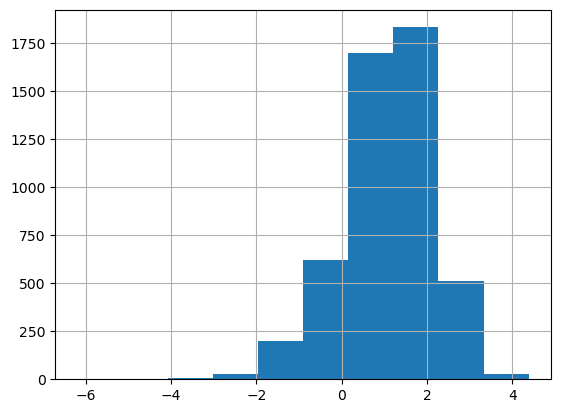

In [61]:
df_nrd_oral['pPOD'].hist()

In [62]:
df_nrd_oral

,dtxsid,count_NOAEL,count_LOAEL,count,average_BMD,SDV_BMD,pPOD,POD
0,DTXSID001004378,2,1,3,1.556369,0.4067,1.282054,1.199673e+01
1,DTXSID001005033,2,0,2,2.457742,0.4067,2.183427,2.462562e+03
2,DTXSID00100756,1,0,1,2.258772,0.4067,1.984457,9.471469e+02
3,DTXSID001009930,1,0,1,0.625195,0.4067,0.350880,2.828707e-05
4,DTXSID001010189,1,1,2,2.724719,0.4067,2.450404,7.805078e+03
...,...,...,...,...,...,...,...,...
4934,DTXSID90976780,2,0,2,0.231900,0.4067,-0.042415,1.884472e-14
4935,DTXSID90978461,2,0,2,-1.565137,0.4067,-1.839452,4.434897e+02
4936,DTXSID9098220,3,0,3,2.084479,0.4067,1.810164,3.777286e+02
4937,DTXSID90990466,1,0,1,1.883833,0.4067,1.609518,1.166701e+02


In [63]:
df_nrd_oral.to_csv(processed_dir+'derived_oral_noncancer_PODs_Aurisano_approach_120524.csv')

In [64]:
toxval_rd = repro.copy()

In [65]:
df_rd_oral = toxval_rd.groupby('dtxsid').agg(
    count_NOAEL=('toxval_type_curated', lambda x: (x == 'NOAEL').sum()),
    count_LOAEL=('toxval_type_curated', lambda x: (x == 'LOAEL').sum()),
    count=('toxval_type_curated', 'count'),
    average_BMD=('logBMD_mean', 'mean'),
    SDV_BMD=('logBMD_mean', 'std')
).reset_index()

In [66]:
df_rd_oral.describe()

,count_NOAEL,count_LOAEL,count,average_BMD,SDV_BMD
count,2678.000000,2678.00000,2678.000000,2678.000000,2328.000000
mean,8.058999,5.17401,13.233010,1.785632,0.316853
std,12.755080,11.92319,24.216313,0.924615,0.267463
min,0.000000,0.00000,1.000000,-5.283109,0.000000
25%,2.000000,0.00000,2.000000,1.240251,0.082794
50%,4.000000,0.00000,4.000000,1.940591,0.294854
75%,9.000000,4.00000,12.000000,2.537849,0.480735
max,243.000000,189.00000,420.000000,4.072278,1.799712


In [67]:
SDV_fixed_rd = 0.480735

# Replace SDV_BMD with SDV_fixed_nrd if it equals 0
df_rd_oral['SDV_BMD'] = df_rd_oral['SDV_BMD'].apply(lambda x: SDV_fixed_rd if x == 0 else x)

# Replace SDV_BMD with SDV_fixed_nrd if count is less than 5
df_rd_oral['SDV_BMD'] = df_nrd_oral.apply(lambda row: SDV_fixed_rd if row['count'] < 5 else row['SDV_BMD'], axis=1)

# Derive POD_(p25BMD_h) as the 25th %-ile of the fitted distribution
df_rd_oral['pPOD'] = df_rd_oral.apply(lambda row: norm.ppf(0.25, loc=row['average_BMD'], scale=row['SDV_BMD']), axis=1)


In [68]:
df_rd_oral['POD'] = df_rd_oral['pPOD']**10

<Axes: >

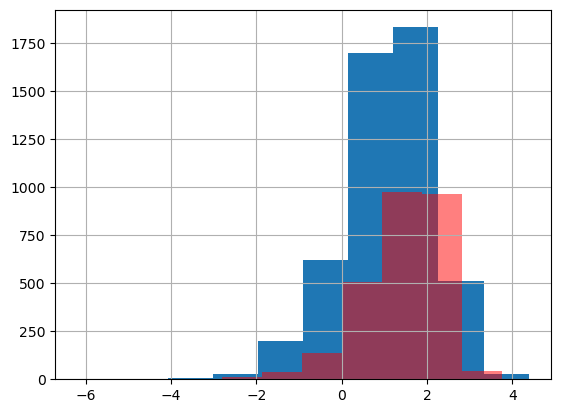

In [72]:
df_nrd_oral['pPOD'].hist()
df_rd_oral['pPOD'].hist(color = 'r', alpha = 0.5)

In [73]:
import openpyxl

In [76]:
pfas = pd.read_excel(interim_dir+'final_universe_wtest_track_120524.xlsx', index_col = [0])

In [77]:
landscape_dict = {k:v for k,v in zip(pfas['dtxsid'], pfas['group_str'])}

In [78]:
ch7_dict = {k:v for k,v in zip(pfas['dtxsid'], pfas['chain_length'])}

In [82]:
ids = list(landscape_dict.keys())

In [85]:
pfas_nrd = df_nrd_oral[df_nrd_oral['dtxsid'].isin(ids)]

In [86]:

pfas_nrd['group'] = pfas_nrd['dtxsid'].replace(landscape_dict)
pfas_nrd['chain'] = pfas_nrd['dtxsid'].replace(ch7_dict)

/tmp/ipykernel_4179029/2517211872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfas_nrd['group'] = pfas_nrd['dtxsid'].replace(landscape_dict)
/tmp/ipykernel_4179029/2517211872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfas_nrd['chain'] = pfas_nrd['dtxsid'].replace(ch7_dict)


In [92]:
pfas_nrd = pfas_nrd.sort_values(by = 'group', ascending = True)

In [99]:
figures_dir = TOP + 'reports/figures/'

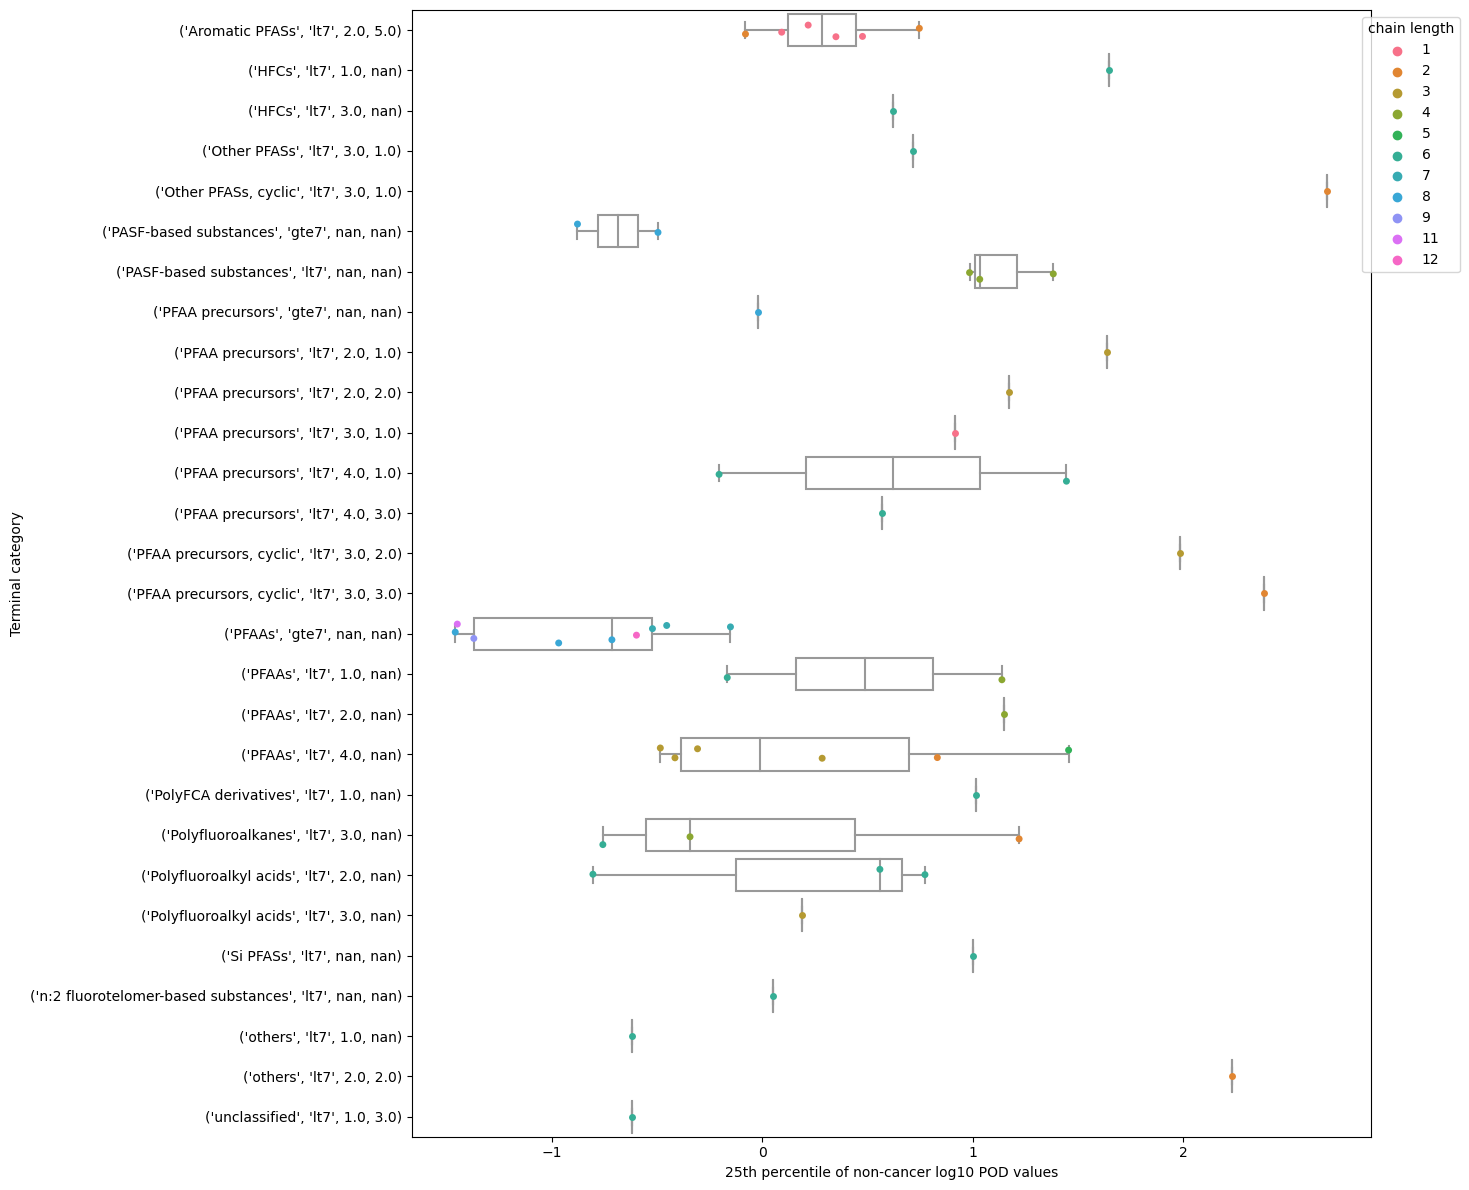

In [100]:
fig, ax = plt.subplots(figsize = (15,12))
ax = sns.boxplot(y= 'group', x = 'pPOD',color = 'white', data = pfas_nrd)
ax = sns.stripplot(y = pfas_nrd.group, x = pfas_nrd['pPOD'], hue = pfas_nrd['chain'].astype('category'), jitter = 0.25,  data = pfas_nrd)
for patch in ax.artists:
    r,g,b,a = patch.get_facecolor()
    patch.set_facecolor((r,g,b,0.3))
sns.color_palette("Pastel2")
ax.legend( title="chain length", loc='upper right', bbox_to_anchor=(1.1,1),)

ax.set_xlabel('25th percentile of non-cancer log10 POD values')
ax.set_ylabel('Terminal category')
plt.tight_layout()  
plt.savefig(figures_dir+'ch7_POD_nrd_oral_120524.png', dpi = 300)

In [101]:
pfas_rd = df_rd_oral[df_rd_oral['dtxsid'].isin(ids)]

In [102]:
pfas_rd['group'] = pfas_rd['dtxsid'].replace(landscape_dict)
pfas_rd['chain'] = pfas_rd['dtxsid'].replace(ch7_dict)

/tmp/ipykernel_4179029/3529840721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfas_rd['group'] = pfas_rd['dtxsid'].replace(landscape_dict)
/tmp/ipykernel_4179029/3529840721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfas_rd['chain'] = pfas_rd['dtxsid'].replace(ch7_dict)


In [103]:
pfas_rd = pfas_rd.sort_values(by = 'group', ascending = True)

In [106]:
pfas_rd.shape

(35, 10)

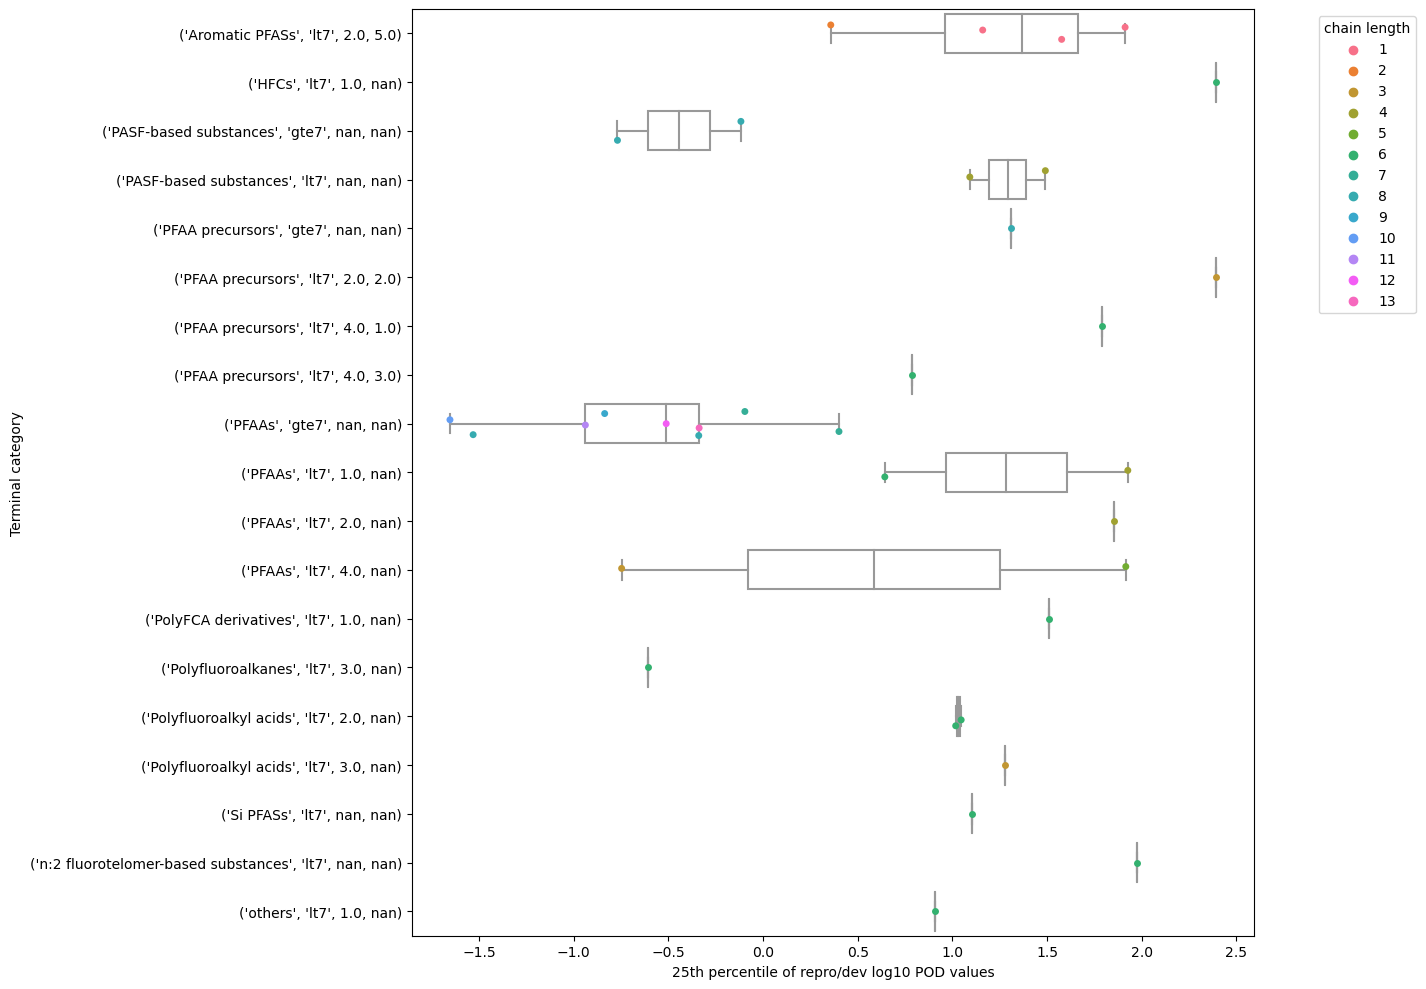

In [109]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.boxplot(y= 'group', x = 'pPOD',color = 'white', data = pfas_rd)
ax = sns.stripplot(y = pfas_rd.group, x = pfas_rd['pPOD'], hue = pfas_rd['chain'].astype('category'), jitter = 0.25,  data = pfas_rd)
for patch in ax.artists:
    r,g,b,a = patch.get_facecolor()
    patch.set_facecolor((r,g,b,0.3))
sns.color_palette("Pastel2")
ax.legend( title="chain length", loc='upper right', bbox_to_anchor=(1.2,1),)

ax.set_xlabel('25th percentile of repro/dev log10 POD values')
ax.set_ylabel('Terminal category')
plt.tight_layout()  

In [111]:
pfas_rd['study_type'] = 'repro/dev'
pfas_nrd['study_type'] = 'non-cancer'

In [130]:
pfas_rd.shape
pfas_nrd.group.nunique()

28

In [141]:
pfas_nrd.groupby('group')['pPOD'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
"('Aromatic PFASs', 'lt7', 2.0, 5.0)",6.0,0.300097,0.292185,-0.080222,0.123316,0.283605,0.444257,0.745897
"('HFCs', 'lt7', 1.0, nan)",1.0,1.644912,NaN,1.644912,1.644912,1.644912,1.644912,1.644912
"('HFCs', 'lt7', 3.0, nan)",1.0,0.619991,NaN,0.619991,0.619991,0.619991,0.619991,0.619991
"('Other PFASs', 'lt7', 3.0, 1.0)",1.0,0.714662,NaN,0.714662,0.714662,0.714662,0.714662,0.714662
"('Other PFASs, cyclic', 'lt7', 3.0, 1.0)",1.0,2.683427,NaN,2.683427,2.683427,2.683427,2.683427,2.683427
"('PASF-based substances', 'gte7', nan, nan)",2.0,-0.687172,0.270521,-0.878459,-0.782815,-0.687172,-0.591528,-0.495884
"('PASF-based substances', 'lt7', nan, nan)",3.0,1.133256,0.217119,0.984457,1.008685,1.032912,1.207655,1.382397
"('PFAA precursors', 'gte7', nan, nan)",1.0,-0.021235,NaN,-0.021235,-0.021235,-0.021235,-0.021235,-0.021235
"('PFAA precursors', 'lt7', 2.0, 1.0)",1.0,1.637670,NaN,1.637670,1.637670,1.637670,1.637670,1.637670


In [129]:
len(set(pfas_rd.group.unique().tolist()+pfas_nrd.group.unique().tolist()))

28

In [113]:
S1 = pd.concat([pfas_nrd, pfas_rd])

In [114]:
S1.dtxsid.nunique()

58

In [115]:
S1.shape

(90, 11)

In [134]:
S1.groupby(['group', 'study_type']).size().reset_index()

,group,study_type,0
0,"('Aromatic PFASs', 'lt7', 2.0, 5.0)",non-cancer,6
1,"('Aromatic PFASs', 'lt7', 2.0, 5.0)",repro/dev,4
2,"('HFCs', 'lt7', 1.0, nan)",non-cancer,1
3,"('HFCs', 'lt7', 1.0, nan)",repro/dev,1
4,"('HFCs', 'lt7', 3.0, nan)",non-cancer,1
5,"('Other PFASs', 'lt7', 3.0, 1.0)",non-cancer,1
6,"('Other PFASs, cyclic', 'lt7', 3.0, 1.0)",non-cancer,1
7,"('PASF-based substances', 'gte7', nan, nan)",non-cancer,2
8,"('PASF-based substances', 'gte7', nan, nan)",repro/dev,2
9,"('PASF-based substances', 'lt7', nan, nan)",non-cancer,3


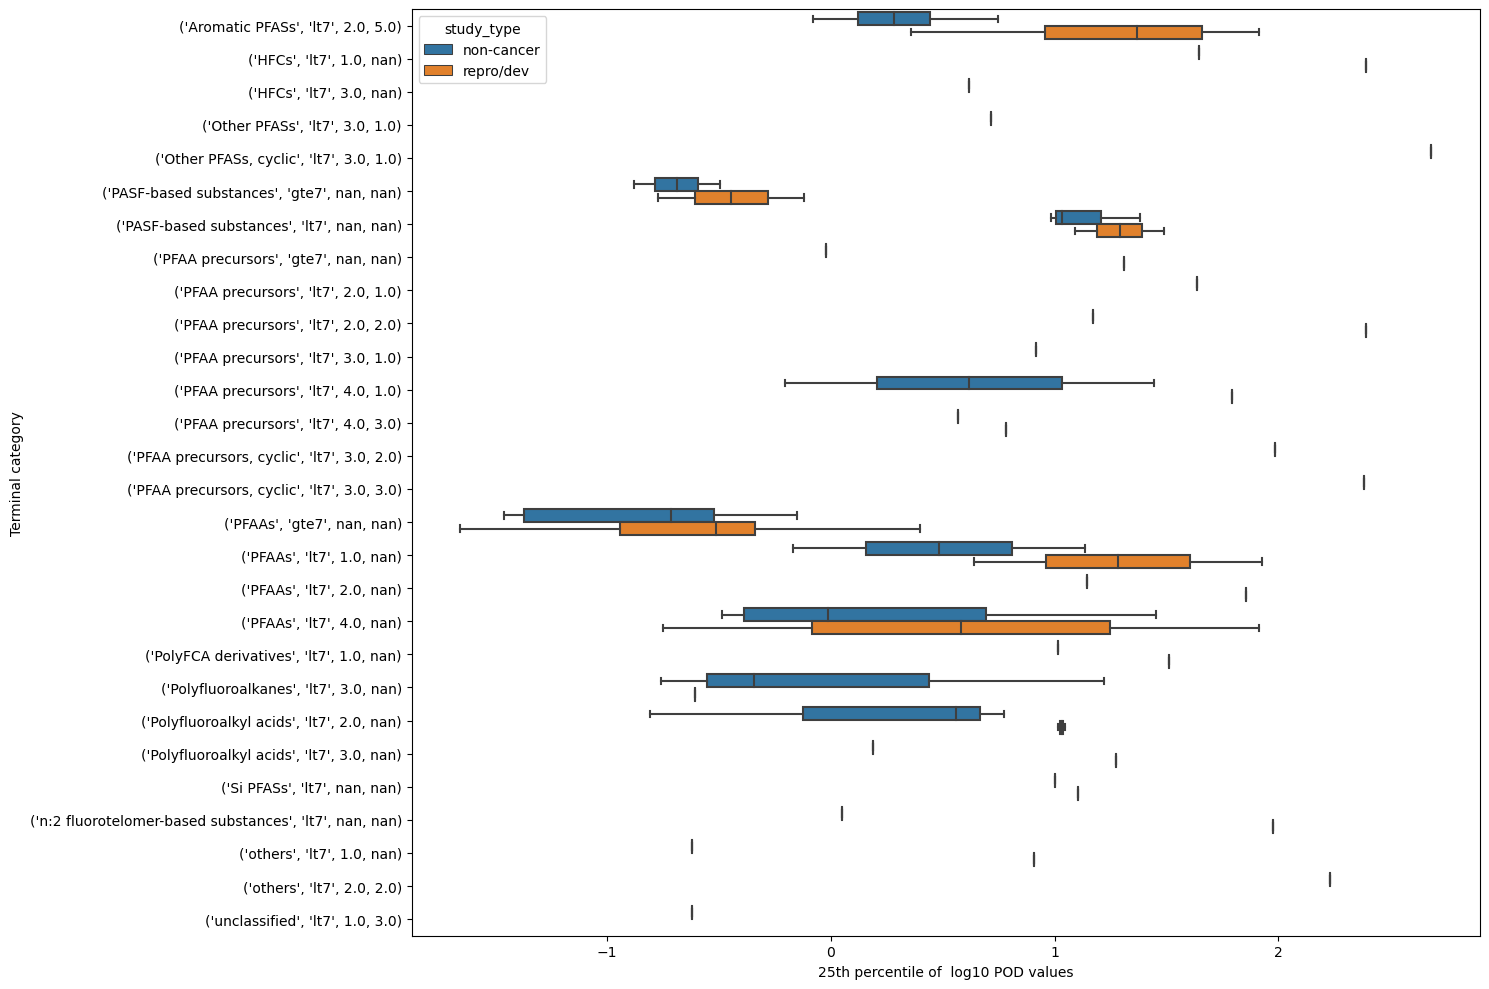

In [117]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.boxplot(y= 'group',x = 'pPOD', hue = 'study_type',data = S1)
#ax = sns.stripplot(y = S1_all.group, x = S1_all['10ptile_POD'], hue = S1_all['chl7'], data = S1_all)
#ax = sns.stripplot(y = S1i.group, x = S1i['10ptile_POD'], hue = S1i['chl7'], data = S1i)


ax.set_xlabel('25th percentile of  log10 POD values')
ax.set_ylabel('Terminal category')
#for xlab in ax.get_yticklabels():xlab.set_rotation(90)
#plt.legend(bbox_to_anchor=(1.3,1), loc='upper right')
plt.tight_layout()  
plt.savefig(figures_dir+'Figure11_oral_PODs_120524.png', dpi = 300)